# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import config
from sklearn.metrics import balanced_accuracy_score, accuracy_score
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib import rc

# Set constants

In [2]:
# set figure details
figsize = (10, 5)
dpi = 200

# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Load data

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy.csv"), index_col=[0, 1])

# get training set predictions
gmhi2_scores_training_set = pd.read_csv(os.path.join(config.PREDICTION_DIR, "gmhi2_scores_training_set.csv"), index_col=[0, 1])
# get ISV predictions
gmhi2_scores_ISV = pd.read_csv(os.path.join(config.PREDICTION_DIR, "gmhi2_scores_ISV.csv"), index_col=[0, 1])


display(gmhi2_scores_training_set.head())
display(y.head())

GMHI2
Study_ID Sample Accession          
GMHI-10  SAMN03283239      1.911264
         SAMN03283266      0.292261
         SAMN03283281      1.012555
         SAMN03283245      1.193557
         SAMN03283294      2.163656

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-10  SAMN03283239                              True
         SAMN03283266                              True
         SAMN03283281                              True
         SAMN03283245                              True
         SAMN03283294                              True

In [5]:
def get_cutoff_performance_df(scores, max_cutoff, interval=0.1):
    dict_list = []
    for cutoff in np.arange(0, max_cutoff + interval, interval):
        idx = (abs(scores) >= cutoff).values
        samples_retained = float(idx.sum())
        bal_acc = balanced_accuracy_score(y[idx], scores[idx] > 0)
        dict_list.append({
            "cutoff" : cutoff,
            "samples retained" : samples_retained,
            "bal_acc" : bal_acc
        })
    df = pd.DataFrame(dict_list)
    return df

In [6]:
def plot_performance_vs_cutoff(scores, max_cutoff, left_y_label, filename):
    df = get_cutoff_performance_df(scores, max_cutoff)
    display(df)
    fig, ax1 = plt.subplots(figsize=figsize, dpi=dpi)

    ax2 = ax1.twinx()
    ax1.plot(df["cutoff"], df["bal_acc"], c="steelblue")
    ax2.plot(df["cutoff"], df["samples retained"], c="orange")

    ax1.set_axisbelow(True)
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    ax1.grid(linestyle = '--', linewidth = 0.75)

    ax1.tick_params(axis="both", labelsize=15)
    ax2.tick_params(axis="both", labelsize=15)

    ax1.set_ylabel(left_y_label, fontsize=15)
    ax2.set_ylabel("Samples retained", fontsize=15)
    ax1.set_xlabel("GMHI2 Magnitude Cutoff", fontsize=15)

    plt.savefig(os.path.join(config.FIGURE_DIR, filename), bbox_inches='tight')

,cutoff,samples retained,bal_acc
0,0.0,8869.0,0.787310
1,0.1,8445.0,0.800944
2,0.2,8045.0,0.814525
3,0.3,7648.0,0.826529
4,0.4,7233.0,0.838035
5,0.5,6816.0,0.849925
6,0.6,6380.0,0.862385
7,0.7,6010.0,0.871705
8,0.8,5633.0,0.881504
9,0.9,5235.0,0.891664


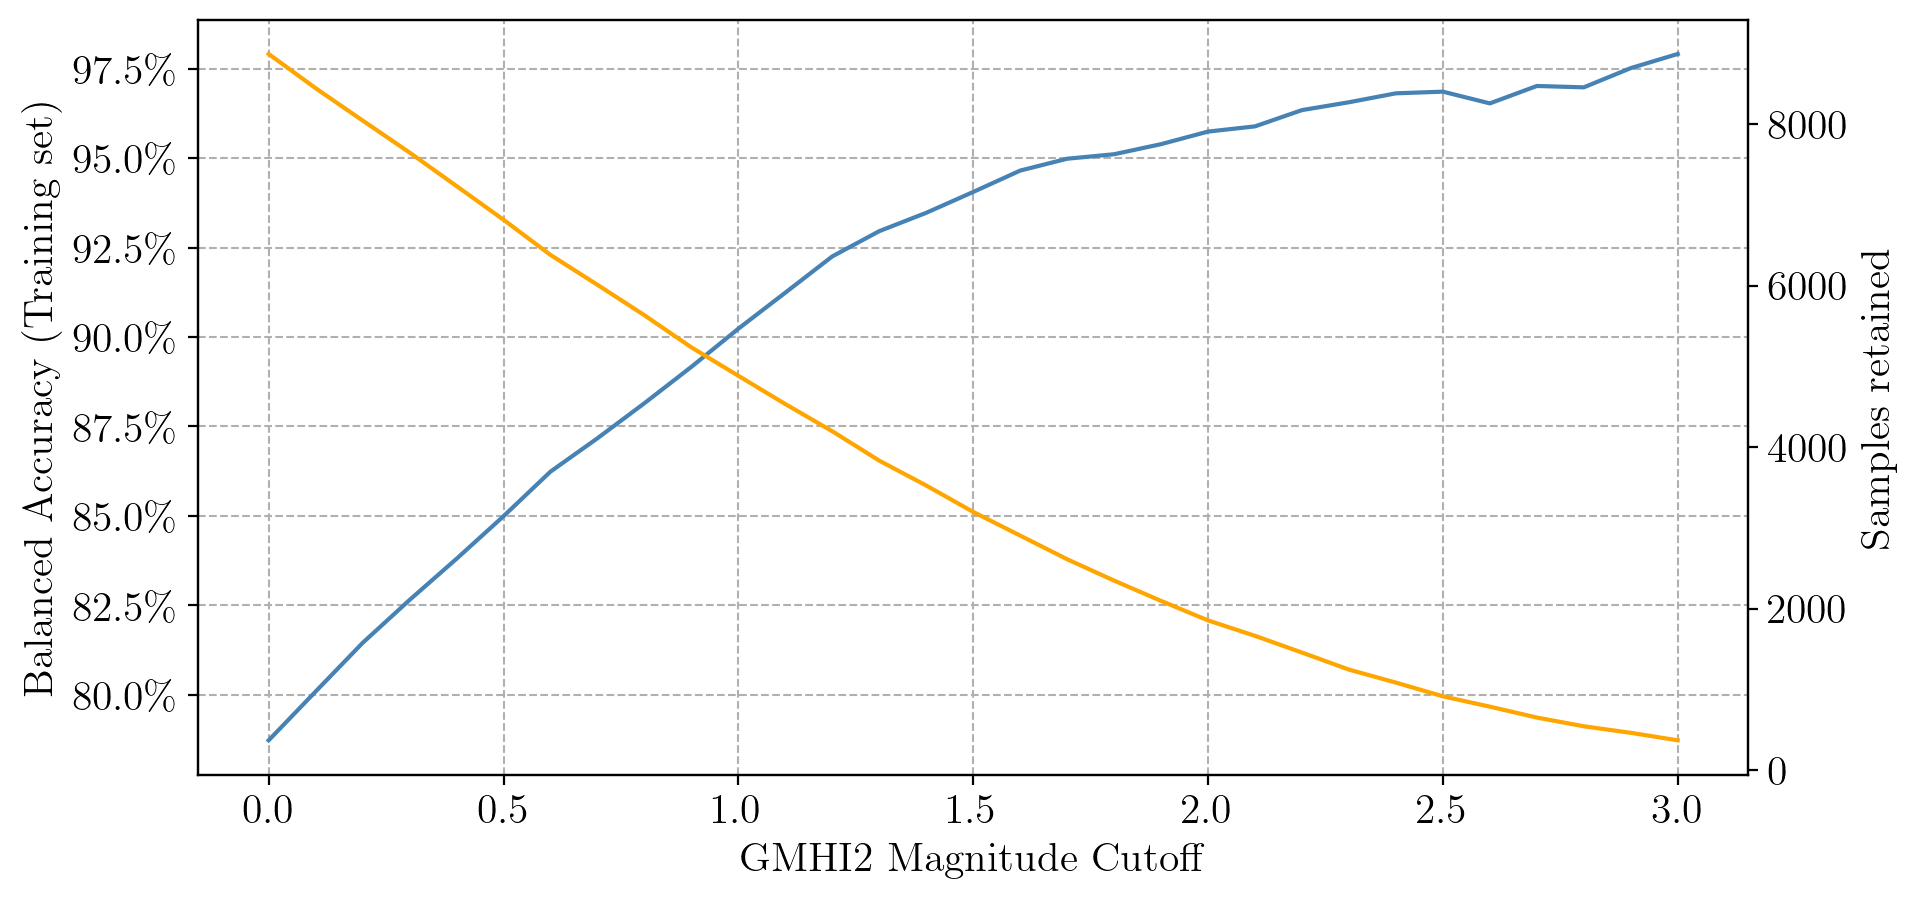

In [9]:
filename = "performance_vs_cutoff_training.svg"
left_y_label = "Balanced Accuracy (Training set)"
max_cutoff = 3
plot_performance_vs_cutoff(gmhi2_scores_training_set, 3, left_y_label, filename)

,cutoff,samples retained,bal_acc
0,0.0,8869.0,0.741493
1,0.1,8443.0,0.754164
2,0.2,7951.0,0.767274
3,0.3,7503.0,0.778740
4,0.4,6984.0,0.792489
5,0.5,6526.0,0.803732
6,0.6,6058.0,0.815588
7,0.7,5612.0,0.826946
8,0.8,5212.0,0.836659
9,0.9,4783.0,0.846888


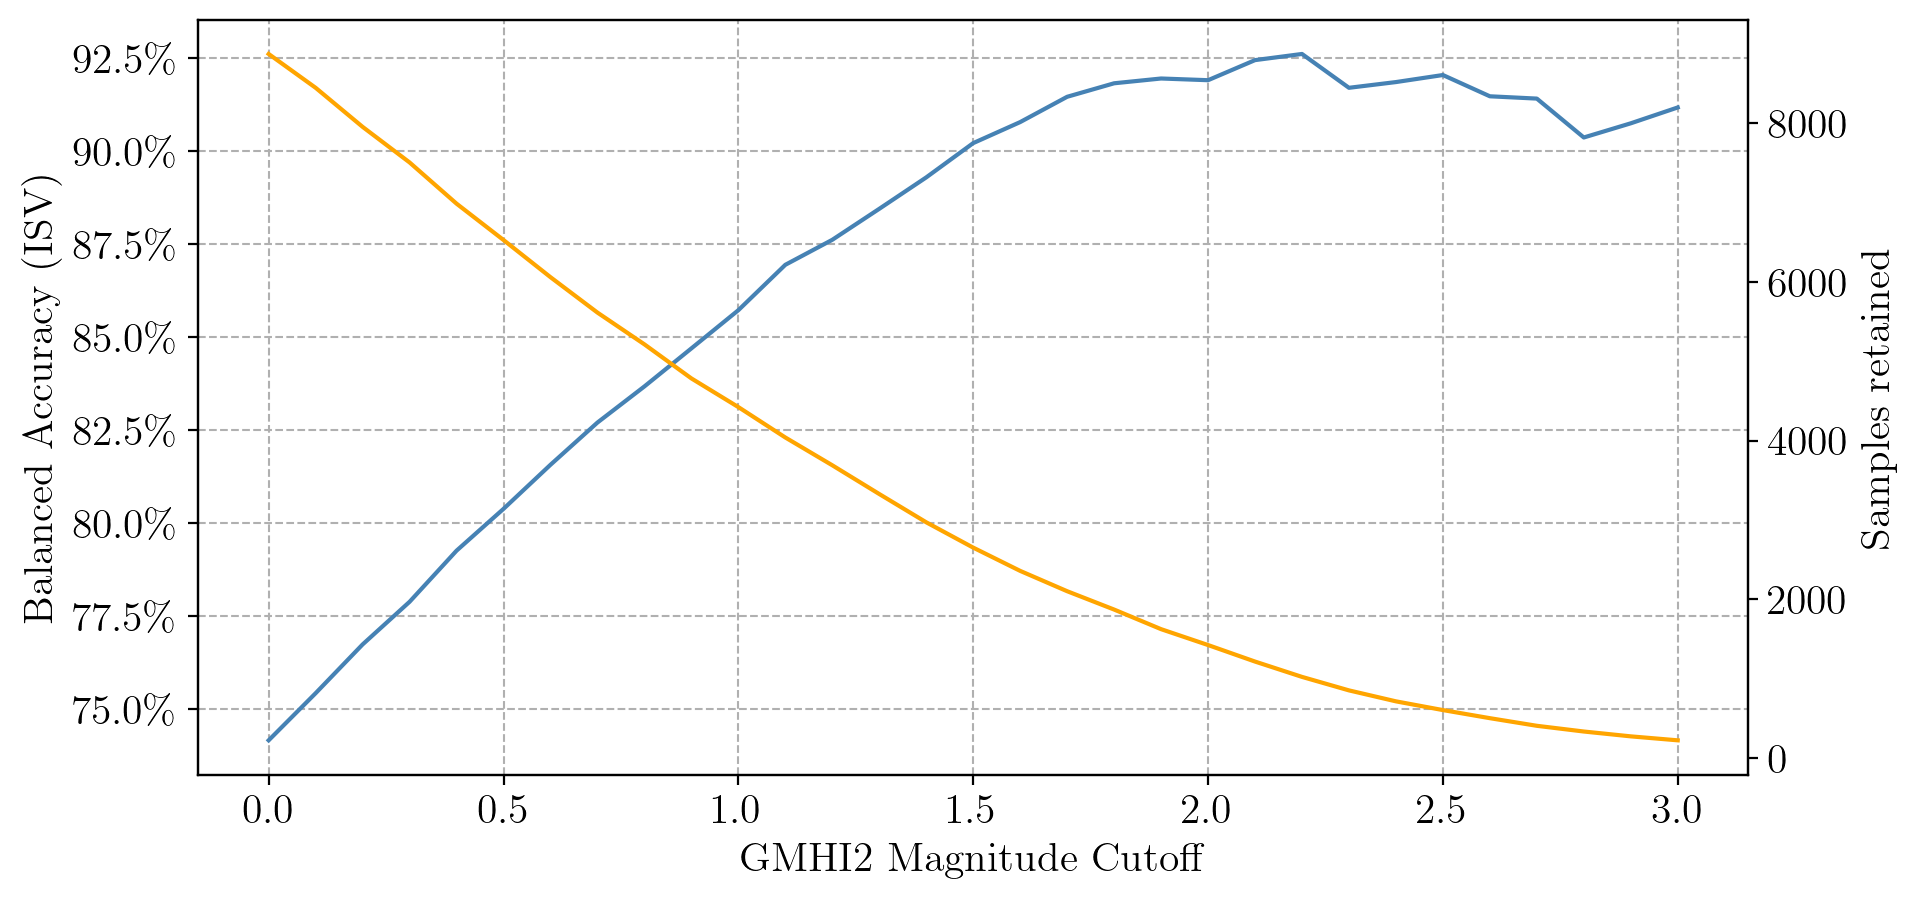

In [10]:
filename = "performance_vs_cutoff_ISV.svg"
left_y_label = "Balanced Accuracy (ISV)"
max_cutoff = 3
plot_performance_vs_cutoff(gmhi2_scores_ISV, 3, left_y_label, filename)